This Jupyter notebooks simulates a fake neural network, so that we know how a stupid predictor that predicts random values of x performs like.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
gap_start_x = 40.0
gap_end_x = 60.0
seed = 420
n_samples_train = 10000
n_samples_gap = 10000
n_samples_test = 10000

In [3]:
# Generate synthetic data
np.random.seed(seed)

# Training data: samples outside the gap
x_train_low = np.random.uniform(0.0, gap_start_x, n_samples_train // 2)
x_train_high = np.random.uniform(gap_end_x, 100.0, n_samples_train // 2)
x_train = np.concatenate([x_train_low, x_train_high])
y_train = x_train  # For simplicity, we'll assume the target is just x itself

# Gap data: samples inside the gap
x_gap = np.random.uniform(gap_start_x, gap_end_x, n_samples_gap)
y_gap = x_gap

# Test data: samples across the entire range
x_test = np.random.uniform(0.0, 100.0, n_samples_test)
y_test = x_test

print(f"Training samples: {len(x_train)}")
print(f"Gap samples: {len(x_gap)}")
print(f"Test samples: {len(x_test)}")

Training samples: 10000
Gap samples: 10000
Test samples: 10000


In [4]:
# Worst-case predictor: generates completely random guesses
def worst_predict(x_data, seed_offset=0):
    """
    Simulates a neural network that generates completely random guesses.
    Returns predictions uniformly distributed between 0 and 100.
    """
    np.random.seed(seed + seed_offset)
    return np.random.uniform(0.0, 100.0, len(x_data))

# Generate predictions
pred_train = worst_predict(x_train, seed_offset=0)
pred_gap = worst_predict(x_gap, seed_offset=1)
pred_test = worst_predict(x_test, seed_offset=2)

In [5]:
# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MAE, RMSE, and Max Error"""
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    max_error = np.max(np.abs(y_true - y_pred))
    return mae, rmse, max_error

# Evaluate on all datasets
mae_train, rmse_train, max_train = calculate_metrics(y_train, pred_train)
mae_gap, rmse_gap, max_gap = calculate_metrics(y_gap, pred_gap)
mae_test, rmse_test, max_test = calculate_metrics(y_test, pred_test)

print("="*60)
print("Worst-Case Predictor Performance (Random Guesses)")
print("="*60)
print(f"\nTraining Set (outside gap [{gap_start_x}, {gap_end_x}]):")
print(f"  MAE:        {mae_train:.4f}")
print(f"  RMSE:       {rmse_train:.4f}")
print(f"  Max Error:  {max_train:.4f}")

print(f"\nGap Set (inside gap [{gap_start_x}, {gap_end_x}]):")
print(f"  MAE:        {mae_gap:.4f}")
print(f"  RMSE:       {rmse_gap:.4f}")
print(f"  Max Error:  {max_gap:.4f}")

print(f"\nTest Set (full range [0, 100]):")
print(f"  MAE:        {mae_test:.4f}")
print(f"  RMSE:       {rmse_test:.4f}")
print(f"  Max Error:  {max_test:.4f}")
print("="*60)

Worst-Case Predictor Performance (Random Guesses)

Training Set (outside gap [40.0, 60.0]):
  MAE:        30.1475
  RMSE:       34.7547
  Max Error:  59.9935

Gap Set (inside gap [40.0, 60.0]):
  MAE:        25.4243
  RMSE:       29.4920
  Max Error:  59.2434

Test Set (full range [0, 100]):
  MAE:        33.0771
  RMSE:       40.6021
  Max Error:  99.0425


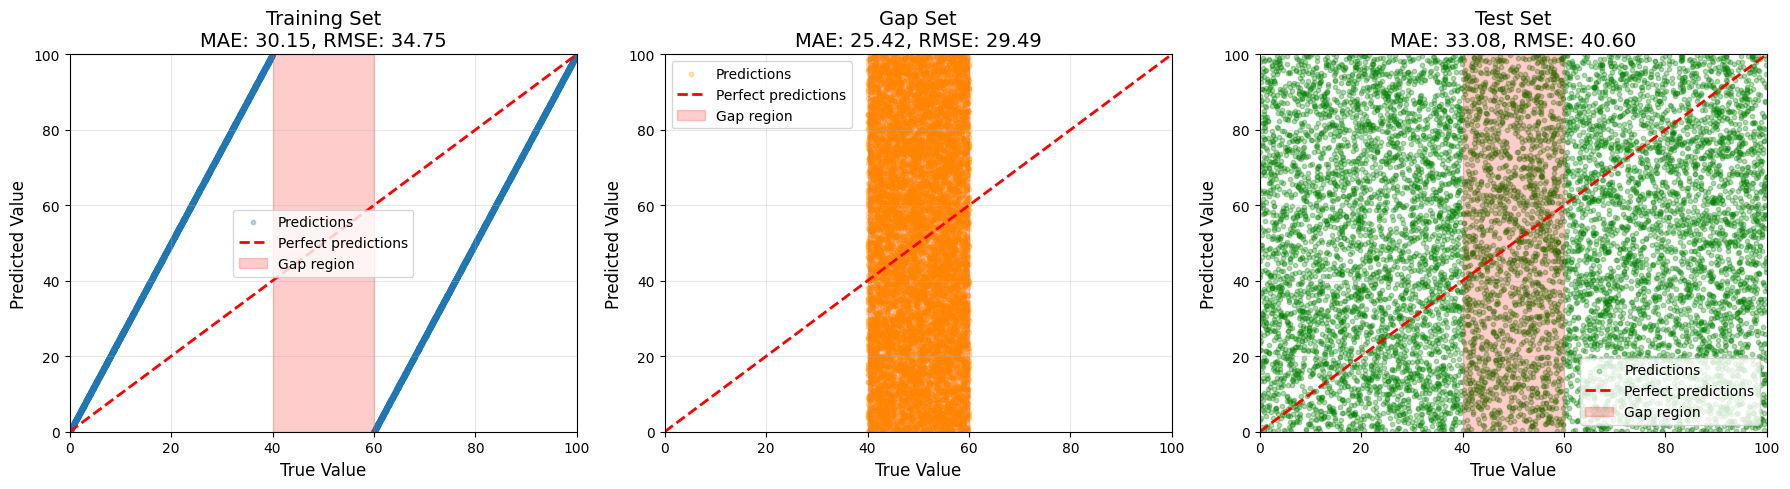

In [6]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training set
axes[0].scatter(y_train, pred_train, alpha=0.3, s=10, label='Predictions')
axes[0].plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect predictions')
axes[0].axvspan(gap_start_x, gap_end_x, alpha=0.2, color='red', label='Gap region')
axes[0].set_xlabel('True Value', fontsize=12)
axes[0].set_ylabel('Predicted Value', fontsize=12)
axes[0].set_title(f'Training Set\nMAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 100)
axes[0].set_ylim(0, 100)

# Gap set
axes[1].scatter(y_gap, pred_gap, alpha=0.3, s=10, label='Predictions', color='orange')
axes[1].plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect predictions')
axes[1].axvspan(gap_start_x, gap_end_x, alpha=0.2, color='red', label='Gap region')
axes[1].set_xlabel('True Value', fontsize=12)
axes[1].set_ylabel('Predicted Value', fontsize=12)
axes[1].set_title(f'Gap Set\nMAE: {mae_gap:.2f}, RMSE: {rmse_gap:.2f}', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 100)
axes[1].set_ylim(0, 100)

# Test set
axes[2].scatter(y_test, pred_test, alpha=0.3, s=10, label='Predictions', color='green')
axes[2].plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect predictions')
axes[2].axvspan(gap_start_x, gap_end_x, alpha=0.2, color='red', label='Gap region')
axes[2].set_xlabel('True Value', fontsize=12)
axes[2].set_ylabel('Predicted Value', fontsize=12)
axes[2].set_title(f'Test Set\nMAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}', fontsize=14)
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, 100)
axes[2].set_ylim(0, 100)

plt.tight_layout()
plt.show()

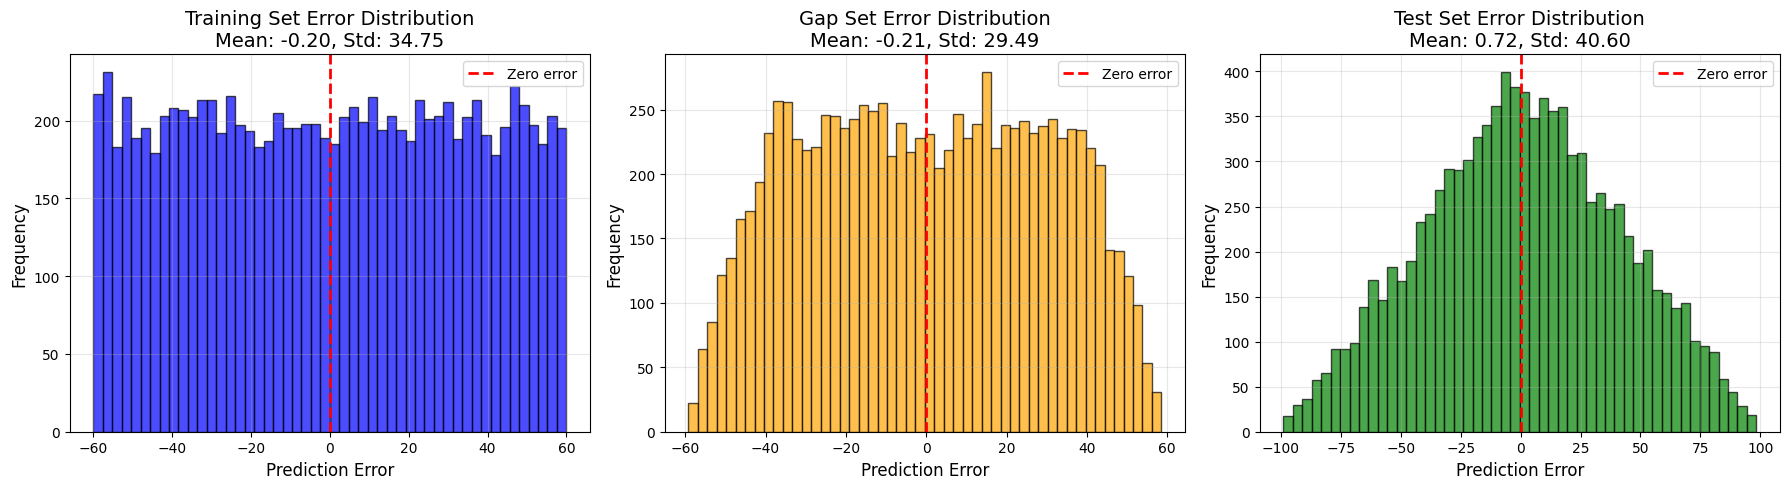

: 

In [ ]:
# Visualize error distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

errors_train = pred_train - y_train
errors_gap = pred_gap - y_gap
errors_test = pred_test - y_test

# Training set errors
axes[0].hist(errors_train, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero error')
axes[0].set_xlabel('Prediction Error', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Training Set Error Distribution\nMean: {np.mean(errors_train):.2f}, Std: {np.std(errors_train):.2f}', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gap set errors
axes[1].hist(errors_gap, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero error')
axes[1].set_xlabel('Prediction Error', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title(f'Gap Set Error Distribution\nMean: {np.mean(errors_gap):.2f}, Std: {np.std(errors_gap):.2f}', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Test set errors
axes[2].hist(errors_test, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[2].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero error')
axes[2].set_xlabel('Prediction Error', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title(f'Test Set Error Distribution\nMean: {np.mean(errors_test):.2f}, Std: {np.std(errors_test):.2f}', fontsize=14)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

This notebook establishes a **baseline for worst-case performance** by simulating a predictor that generates completely random guesses uniformly distributed between 0 and 100.

### Key Observations:

1. **Random Baseline**: Since predictions are uniformly random between 0-100, we expect:
   - Average error around **28.87** (for uniform distribution, MAE ≈ range/√12 ≈ 100/3.46)
   - RMSE around **33.33** (for uniform distribution, RMSE ≈ range/√3 ≈ 100/1.73)

2. **No Learning**: The predictor shows no ability to learn from the training data - errors are consistent across all datasets (train, gap, test).

3. **Performance Target**: Any real neural network should perform **significantly better** than these baseline metrics. If a model's performance approaches these values, it indicates the model has failed to learn meaningful patterns.

This establishes the lower bound for acceptable model performance in Experiment 1.